# Manifold Learning - The S Dataset - Classification

## Example code is using the following template
http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html
    
### Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

Automatically created module for IPython interactive environment


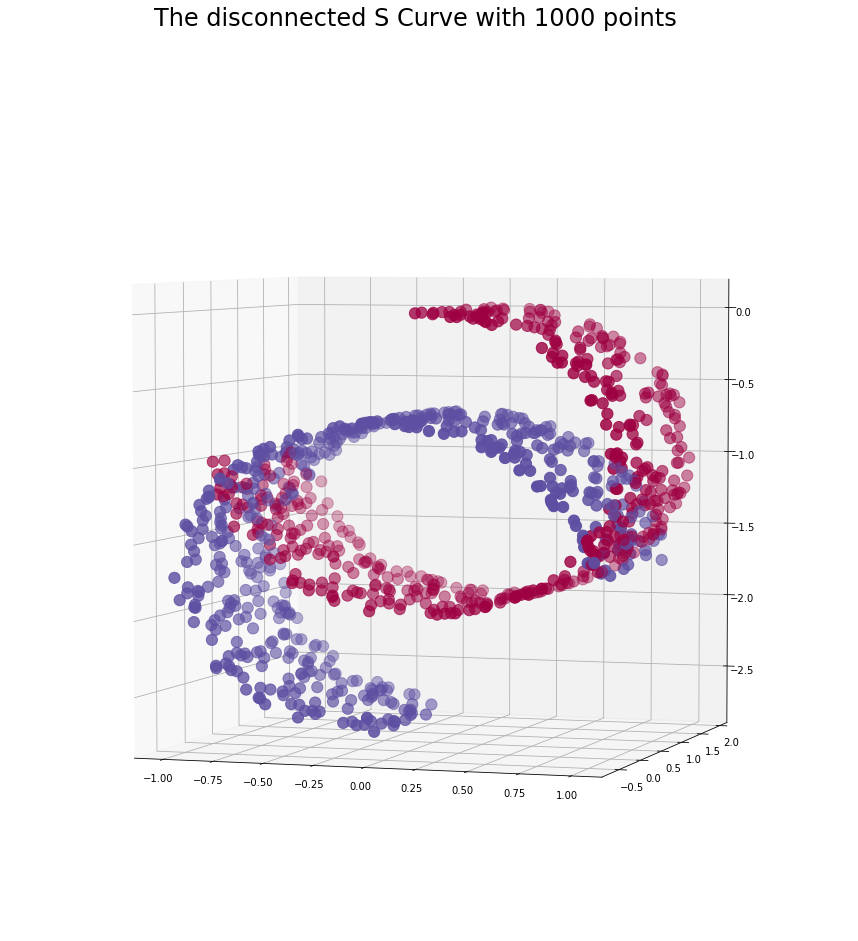

In [56]:
# Adjustments by S.Kuehn, stefan.kuehn@xing.com

print(__doc__)

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
%matplotlib inline
from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
labels = X[:,2]>0+0.0 

# We now introduce a slight modification to the S curve - we lift the upper part a bit up and cut the S into two parts
X[X[:,2]>=0,1] = X[X[:,2]>=0,1]-0.7
X[X[:,2]>=0,2] = X[X[:,2]>=0,2]-2.7

fig = plt.figure(figsize=(15, 15))
plt.suptitle("The disconnected S Curve with %i points"
             % (n_points), fontsize=24)


ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap=plt.cm.Spectral,s=125)
ax.view_init(4, -72)


# Random Projections

http://scikit-learn.org/stable/modules/random_projection.html

(-2.641271616657451,
 0.13175888833113372,
 -3.0698652900096284,
 0.5571558799289369)

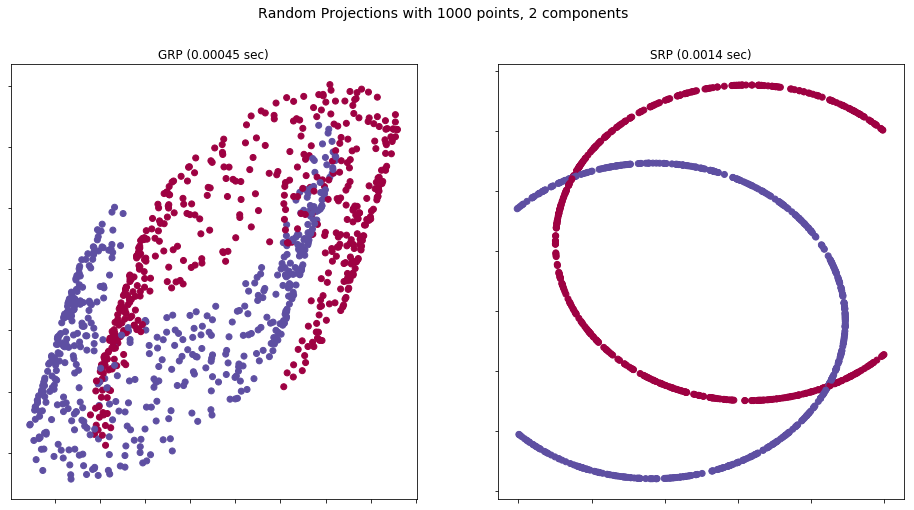

In [67]:
from sklearn import random_projection
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(16, 8))
plt.suptitle("Random Projections with %i points, %i components"
             % (n_points, n_components), fontsize=14)

init_random_state=0

t0 = time()
transformer = random_projection.GaussianRandomProjection(n_components=2, random_state=init_random_state)
Y1 = transformer.fit_transform(X)
t1 = time()
    
ax = fig.add_subplot(121)
plt.scatter(Y1[:, 0], Y1[:, 1], c=labels, cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('GRP', t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
transformer = random_projection.SparseRandomProjection(n_components=2, random_state=init_random_state)
Y2 = transformer.fit_transform(X)
t1 = time()
    
ax = fig.add_subplot(121+1)
plt.scatter(Y2[:, 0], Y2[:, 1], c=labels, cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('SRP', t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')



# Last but not least: PCA

(-1.7152252614266028,
 1.775092333772579,
 -1.620270412398396,
 1.6495233307507424)

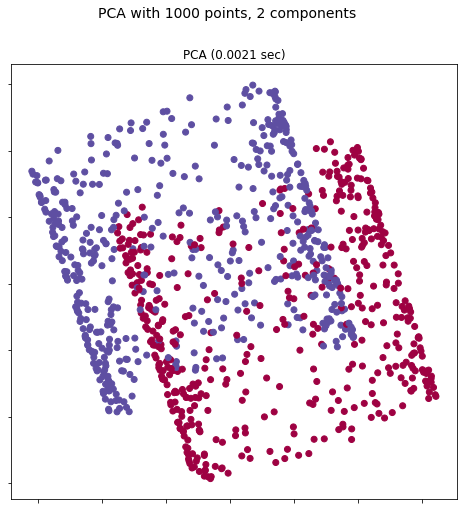

In [68]:
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8, 8))
plt.suptitle("PCA with %i points, %i components"
             % (n_points, n_components), fontsize=14)

init_random_state=0

t0 = time()
pca = PCA(n_components=2)
Y = pca.fit_transform(X)
t1 = time()
    
ax = fig.add_subplot(111)
plt.scatter(Y[:, 0], Y[:, 1], c=labels, cmap=plt.cm.Spectral)
plt.title("%s (%.2g sec)" % ('PCA', t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


# Add to feature set

In [49]:
import numpy as np
from sklearn import neighbors, linear_model

In [50]:
X.shape, Y.shape

((1000, 3), (1000, 2))

In [51]:
labels.shape

(1000,)

In [62]:
X_train = X[:int(.9 * n_samples)]
X_test = X[int(.9 * n_samples):]
y_train = labels[:int(.9 * n_samples)]
y_test = labels[int(.9 * n_samples):]

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression()

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.930000
LogisticRegression score: 0.700000


In [69]:
X_enriched = np.c_[X,Y,Y1,Y2]
n_samples = len(X_enriched)

X_train = X_enriched[:int(.9 * n_samples)]
X_test = X_enriched[int(.9 * n_samples):]
y_train = labels[:int(.9 * n_samples)]
y_test = labels[int(.9 * n_samples):]


knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression()

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.940000
LogisticRegression score: 0.700000
